In [1]:
%matplotlib inline

import os
import json
import pickle

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from cell_level import FeatureEngineering, Instance

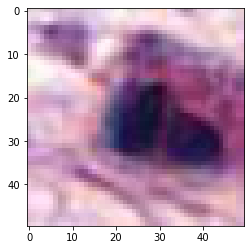

In [3]:
path_mask = "/workspaces/dev-container/testing/data/segmentation/mrcnn/masks/eocell-25-0.9554.png"
path_image = "/workspaces/dev-container/testing/data/CellCrops/eosinophil/25.jpg"
mask = np.array(Image.open(path_mask))
image = np.array(Image.open(path_image))
plt.imshow(image)

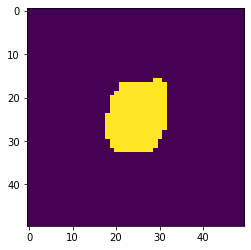

In [4]:
plt.imshow(mask)

In [5]:
features = FeatureEngineering.FeatureManager(geometric_feature = ["InsideRadialContact"])

In [6]:
data = features(Instance.Instance(mask=mask, image=image))

[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.41 1.41 1.   1.
 2.   2.   2.   2.   2.   2.   2.   2.24 2.   1.   1.   1.41 2.24 3.
 3.   3.   3.   3.   3.   3.   2.   1.   1.   1.41 2.24 2.83 3.61 4.
 4.   4.   4.   4.   3.   2.   1.   1.   2.   2.83 3.61 4.24 5.   5.
 5.   5.   4.   3.   2.   1.   1.   2.   3.   4.   5.   5.66 6.   6.
 5.   4.   3.   2.   1.   1.   2.   3.   4.   5.   6.   7.   6.   5.
 4.   3.   2.   1.   1.   1.41 2.24 3.16 4.12 5.1  6.08 7.   6.   5.
 4.   3.   2.   1.   1.   2.   2.83 3.61 4.47 5.39 6.32 6.71 5.83 5.
 4.   3.   2.   1.   1.   2.   3.   4.   5.   5.83 6.71 6.32 5.39 4.47
 3.61 2.83 2.   1.   1.   2.   3.   4.   5.   5.83 6.   5.83 5.   4.12
 3.16 2.24 1.41 1.   1.   2.   2.83 3.61 4.47 5.   5.   5.   4.47 3.61
 2.83 2.   1.   1.   1.41 2.24 3.16 4.   4.   4.   4.   4.   3.16 2.24
 1.41 1.   1.   2.   2.83 3.   3.   3.   3.   3.   2.83 2.   1.   1.
 1.41 2.   2.   2.   2.   2.   2.   2.   1.41 1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.  ]

In [7]:
data

OrderedDict([('InsideRadialContact0', 0),
             ('InsideRadialContact1', 58),
             ('InsideRadialContact2', 48),
             ('InsideRadialContact3', 32),
             ('InsideRadialContact4', 26),
             ('InsideRadialContact5', 24),
             ('InsideRadialContact6', 13)])

In [8]:
dataframe = pd.DataFrame(
    columns = list(data.keys())
)
dataframe

,InsideRadialContact0,InsideRadialContact1,InsideRadialContact2,InsideRadialContact3,InsideRadialContact4,InsideRadialContact5,InsideRadialContact6


In [9]:
dataframe = dataframe.append(data, ignore_index=True)
dataframe

,InsideRadialContact0,InsideRadialContact1,InsideRadialContact2,InsideRadialContact3,InsideRadialContact4,InsideRadialContact5,InsideRadialContact6
0,0,58,48,32,26,24,13


In [10]:
dataframe.to_csv('temp.csv')